<a href="https://colab.research.google.com/github/vasanthk99/ADS_assignment1-rework-/blob/main/Assignment2_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
import time

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  

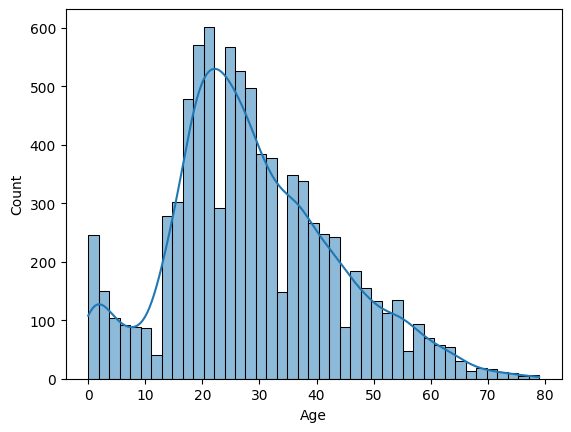

In [ ]:
# Load data
train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/test.csv')

# Check column names
print(train_df.columns)
print(test_df.columns)

# Exploratory Data Analysis (EDA)
train_df.info()
train_df.describe()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

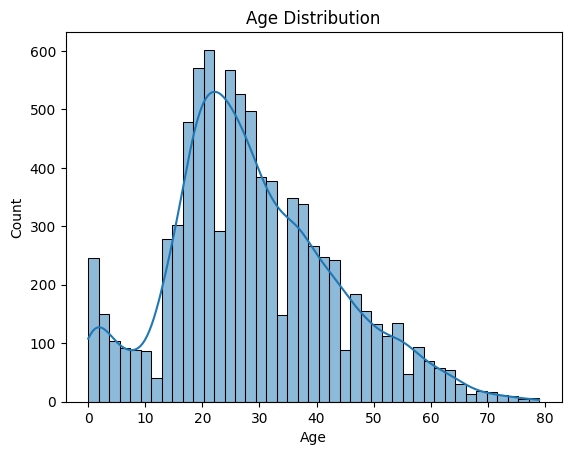

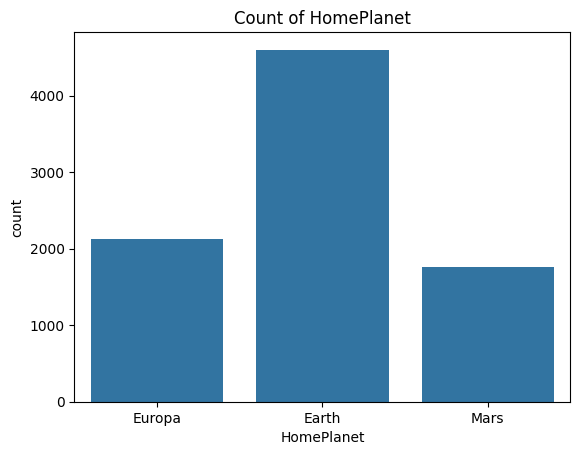

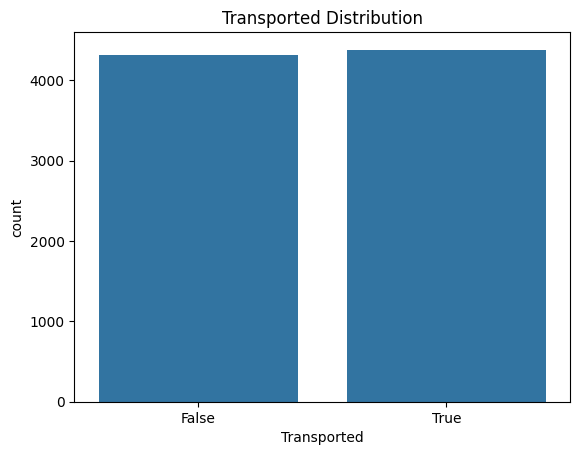

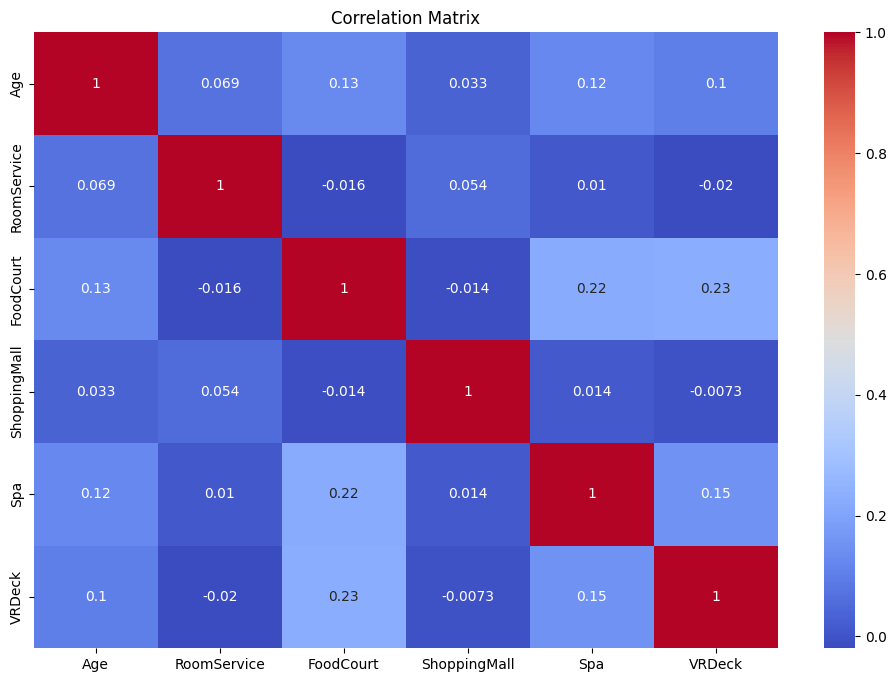

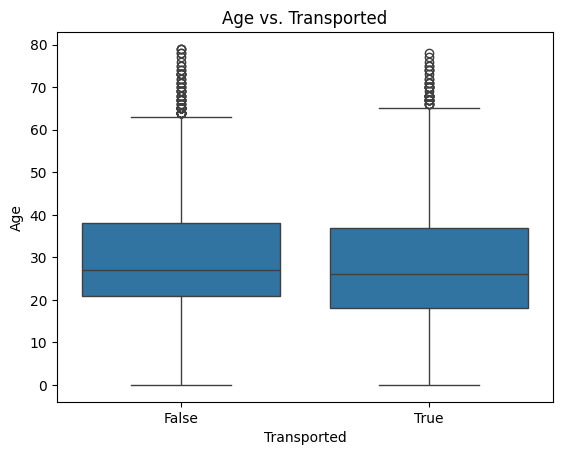

In [ ]:
# Example visualizations
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('Count of HomePlanet')
plt.show()

sns.countplot(x='Transported', data=train_df)
plt.title('Transported Distribution')
plt.show()

# Only include numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.boxplot(x='Transported', y='Age', data=train_df)
plt.title('Age vs. Transported')
plt.show()

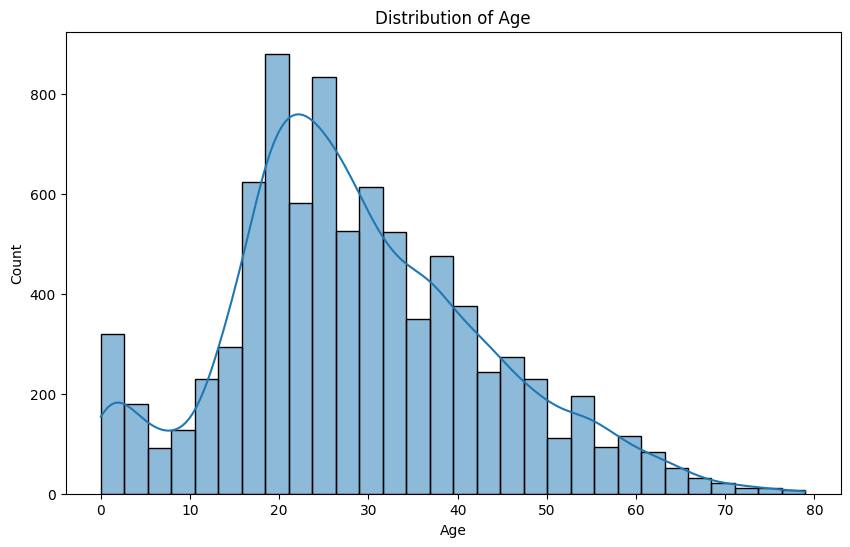

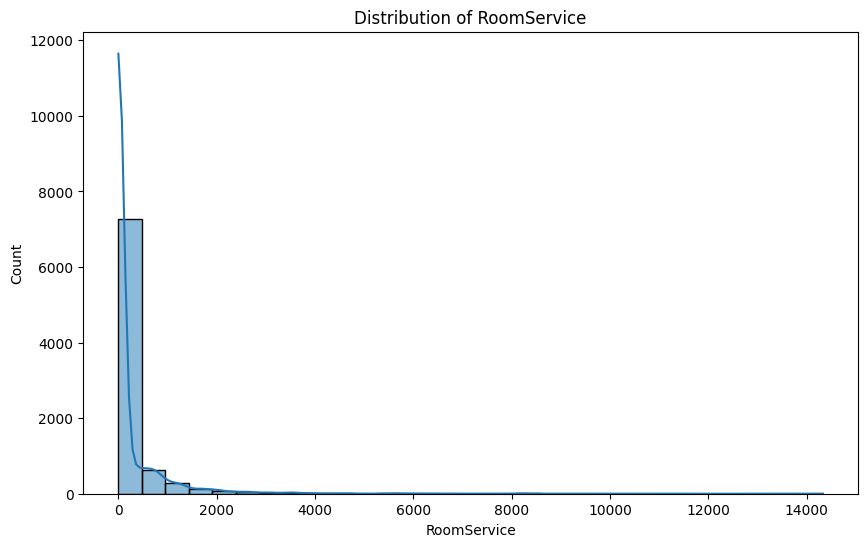

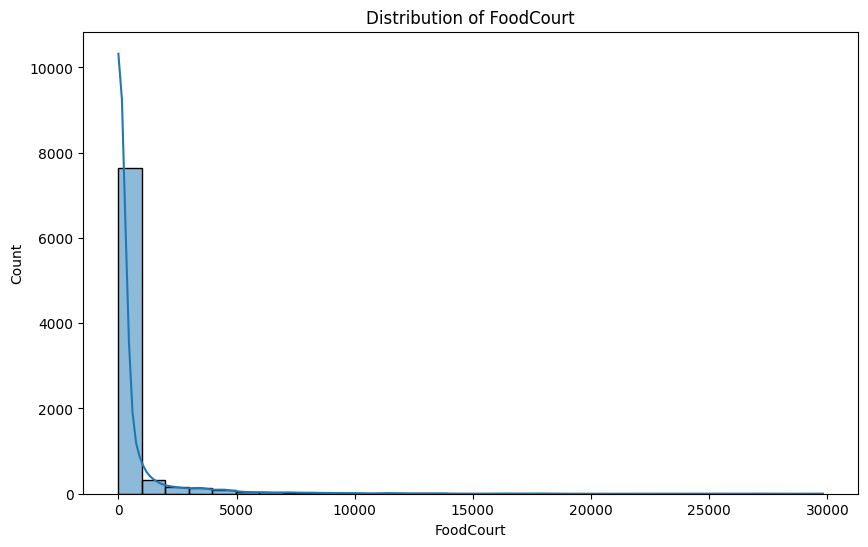

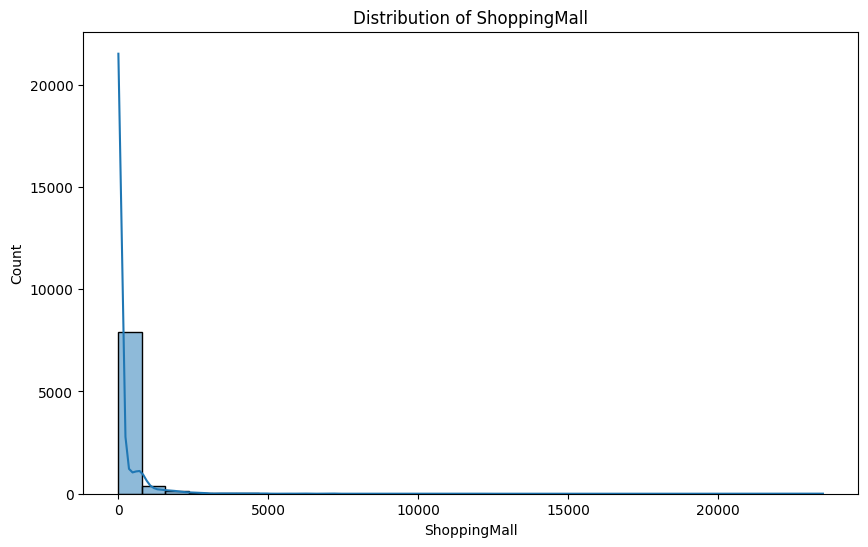

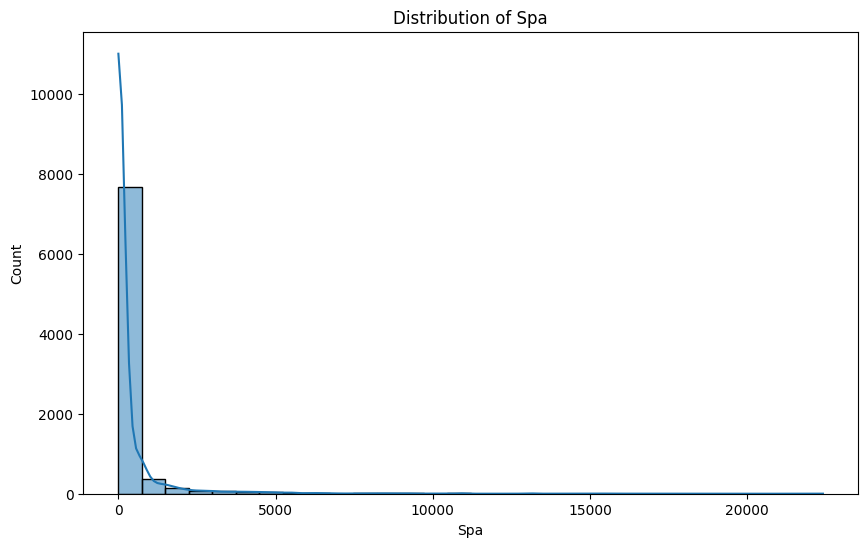

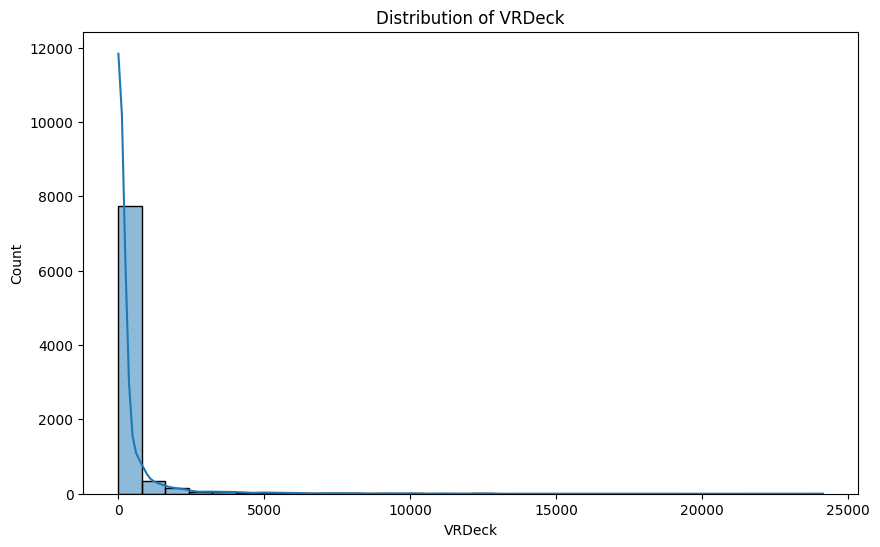

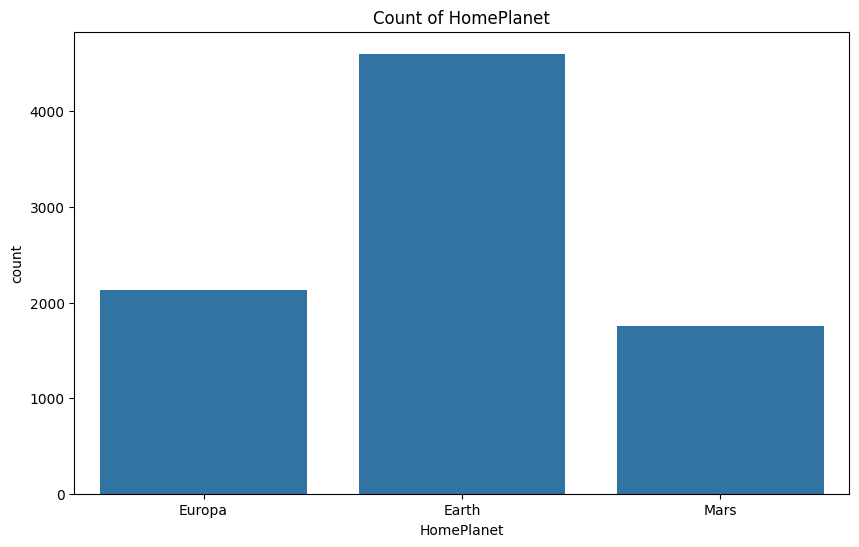

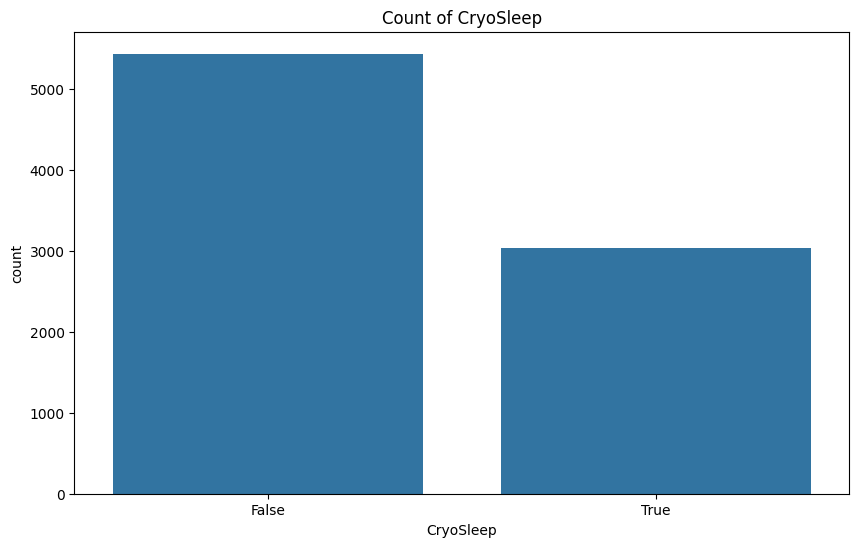

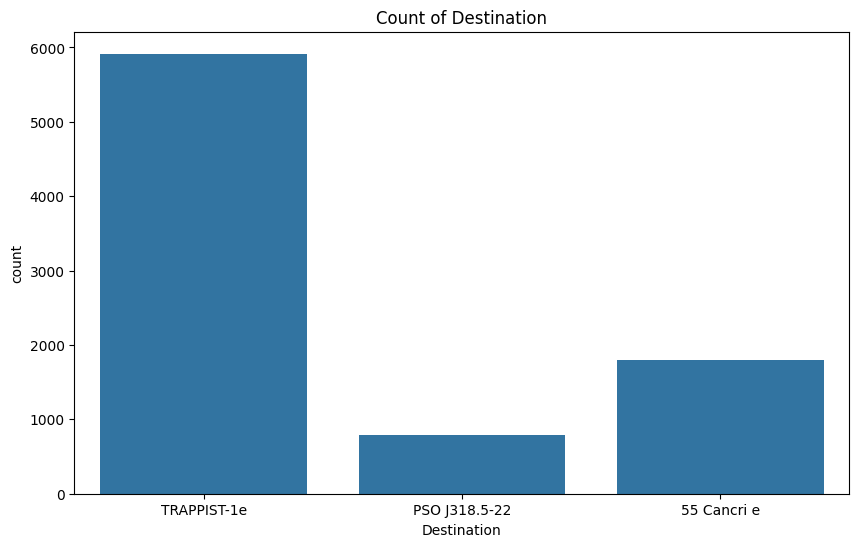

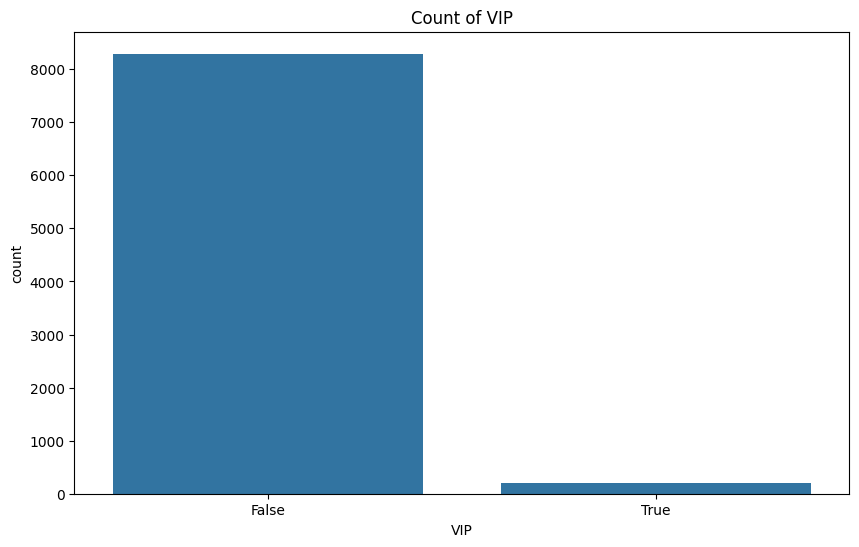

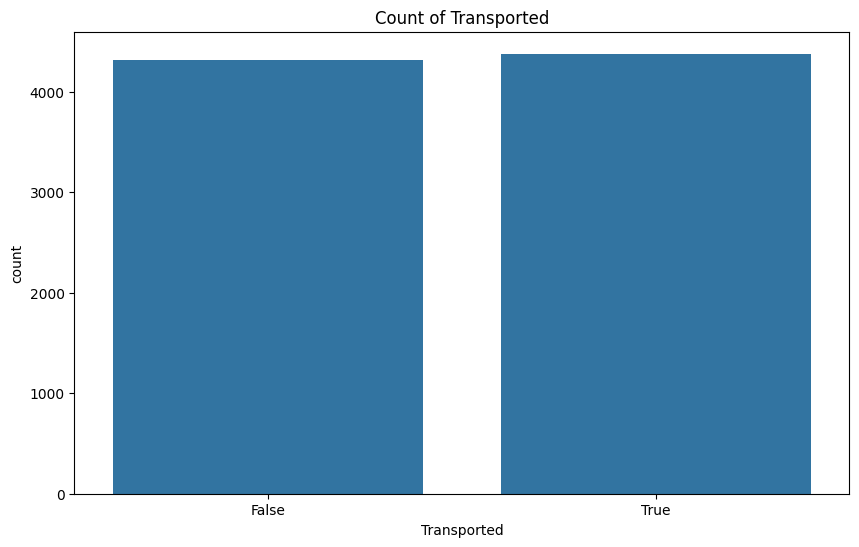

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot distribution of categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()


In [ ]:
zero_mask_age = train_df['Age'] == 0

# Count the number of zeros in the 'Age' column
numb_zeros_age = zero_mask_age.sum()
print(f"Number of zeros in 'Age' column: {numb_zeros_age}")

Number of zeros in 'Age' column: 178


In [ ]:
numeric_features_space_tit = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = SimpleImputer(strategy='mean')

Does the Age column have any 0 values? True


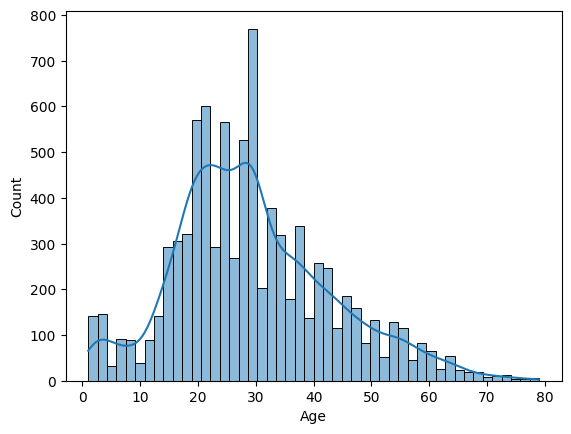

In [ ]:
has_zero_age = (train_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero_age}")
train_df['Age'] = train_df['Age'].replace(0, np.nan)
train_df['Age'] = imputer.fit_transform(train_df[['Age']]).ravel()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

In [ ]:
for feature in numeric_features_space_tit:
    has_nan_val = train_df[feature].isna().any()
    print(f"Does the '{feature}' column before imputer have any NaN values? {has_nan_val}")
print("\n\n\n")
train_df[numeric_features_space_tit] = imputer.fit_transform(train_df[numeric_features_space_tit])


for feature in numeric_features_space_tit:
    has_nan_val = train_df[feature].isna().any()
    print(f"Does the '{feature}' column have after imputer any NaN values? {has_nan_val}")


print(train_df[numeric_features_space_tit])




Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0 

In [ ]:
test_df
has_zero1_test = (test_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero1_test}")

Does the Age column have any 0 values? True


In [ ]:
zero_mask_test_age = test_df['Age'] == 0

# Count the number of zeros in the 'Age' column
num_zeros_test_age = zero_mask_test_age.sum()
print(f"Number of zeros in 'Age' column: {num_zeros_test_age}")

Number of zeros in 'Age' column: 82


In [ ]:
test_df['Age'] = test_df['Age'].replace(0, np.nan)
test_df['Age'] = imputer.fit_transform(test_df[['Age']]).ravel()

In [ ]:
for feature1 in numeric_features_space_tit:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column before imputer have any NaN values? {has_nan_test}")
print("\n\n\n")
test_df[numeric_features_space_tit] = imputer.fit_transform(test_df[numeric_features_space_tit])


for feature1 in numeric_features_space_tit:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column have after imputer any NaN values? {has_nan_test}")

Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False


In [ ]:
has_nan_train_HomePlanet = train_df['HomePlanet'].isna().any()
print(f"Does the HomePlanet column before imputer have any NaN values? {has_nan_train_HomePlanet}")

Does the HomePlanet column before imputer have any NaN values? True


In [ ]:
categorical_features_space_tit = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
# Initialize the SimpleImputer for the categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [ ]:
# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features_space_tit:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")


print("\n\n\n")
train_df[categorical_features_space_tit] = categorical_imputer.fit_transform(train_df[categorical_features_space_tit])
test_df[categorical_features_space_tit] = categorical_imputer.transform(test_df[categorical_features_space_tit])

# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features_space_tit:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")

Does the 'HomePlanet' column Train before imputer have any NaN values? True
Does the 'HomePlanet' column Test before imputer have any NaN values? True
Does the 'CryoSleep' column Train before imputer have any NaN values? True
Does the 'CryoSleep' column Test before imputer have any NaN values? True
Does the 'Cabin' column Train before imputer have any NaN values? True
Does the 'Cabin' column Test before imputer have any NaN values? True
Does the 'Destination' column Train before imputer have any NaN values? True
Does the 'Destination' column Test before imputer have any NaN values? True
Does the 'VIP' column Train before imputer have any NaN values? True
Does the 'VIP' column Test before imputer have any NaN values? True




Does the 'HomePlanet' column Train before imputer have any NaN values? False
Does the 'HomePlanet' column Test before imputer have any NaN values? False
Does the 'CryoSleep' column Train before imputer have any NaN values? False
Does the 'CryoSleep' column Test bef

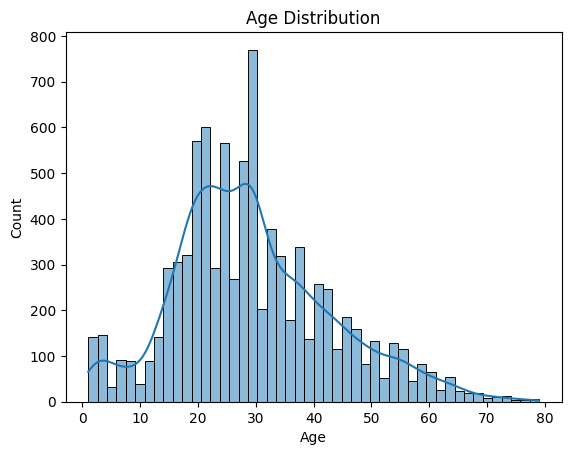

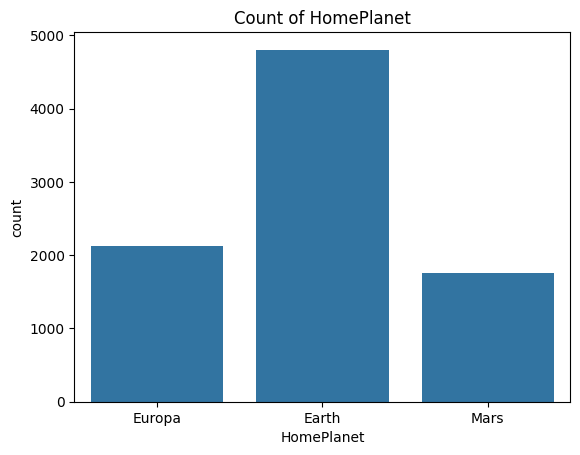

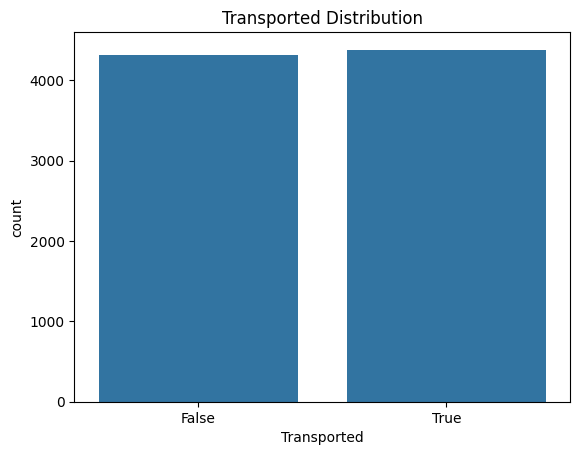

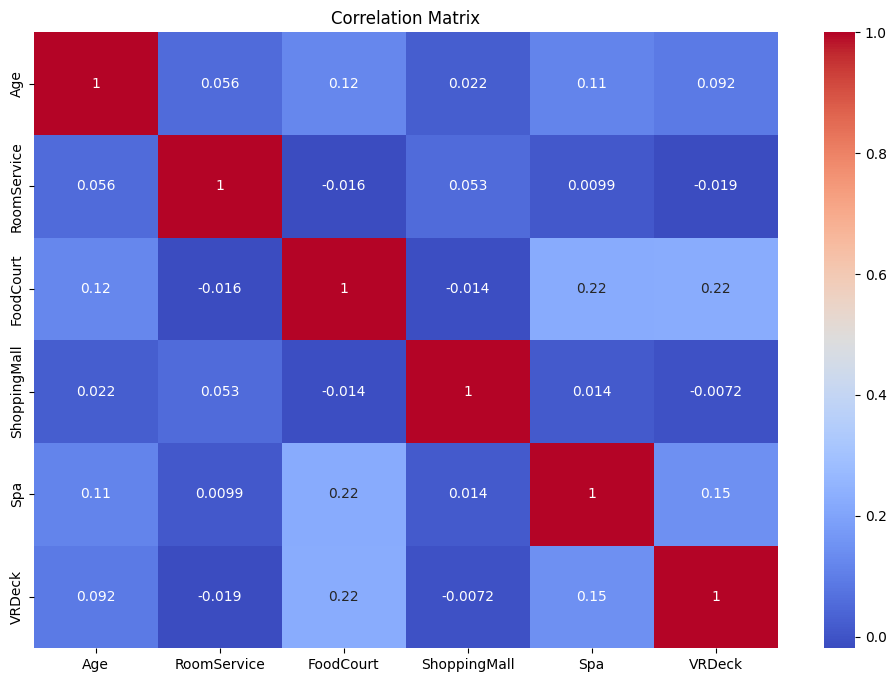

In [ ]:
# Example visualizations
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('Count of HomePlanet')
plt.show()

sns.countplot(x='Transported', data=train_df)
plt.title('Transported Distribution')
plt.show()

# Only include numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

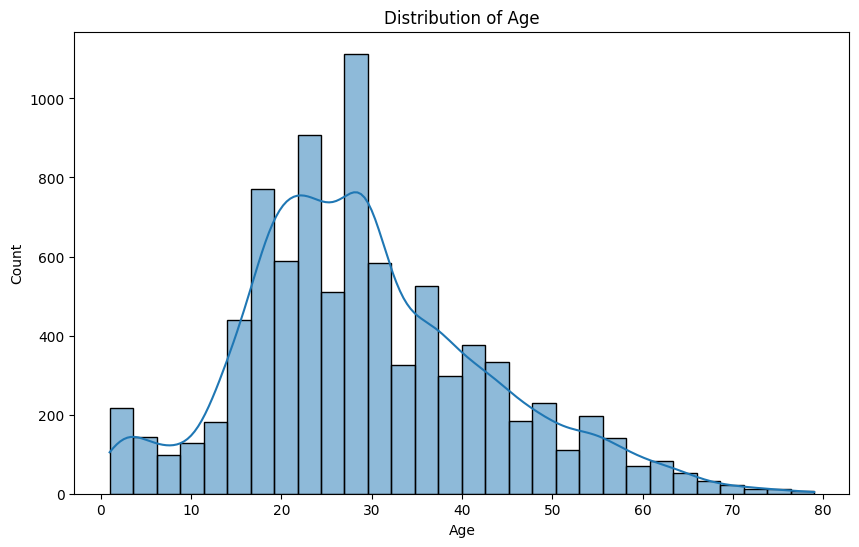

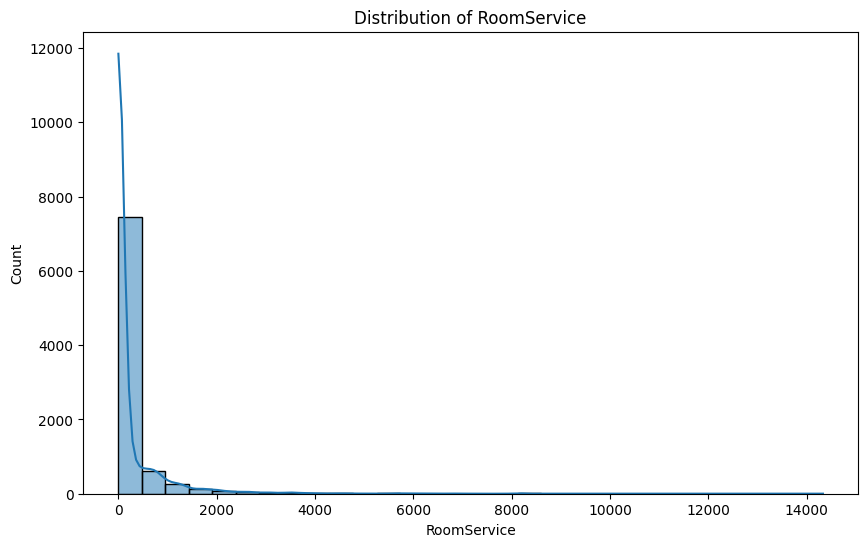

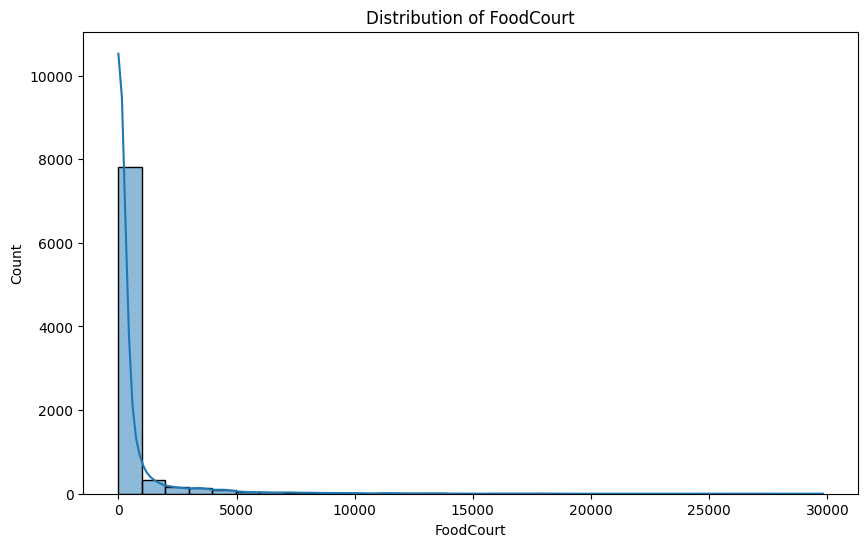

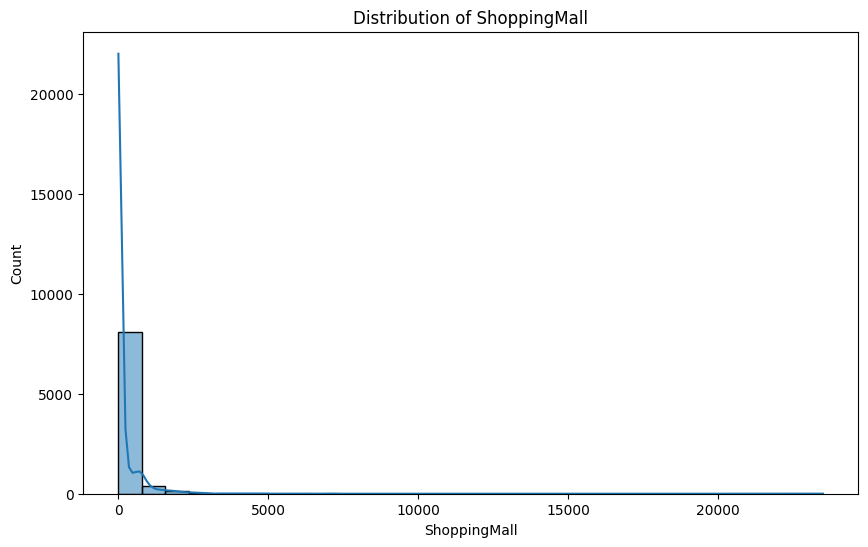

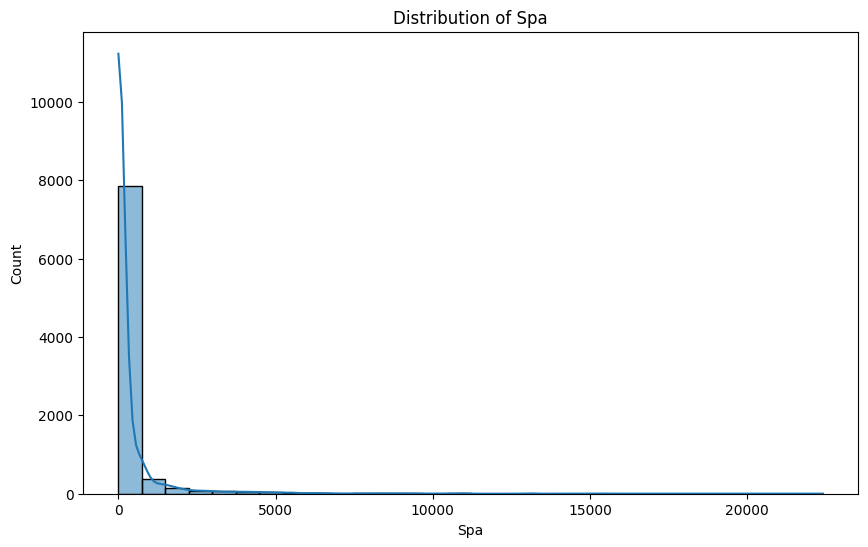

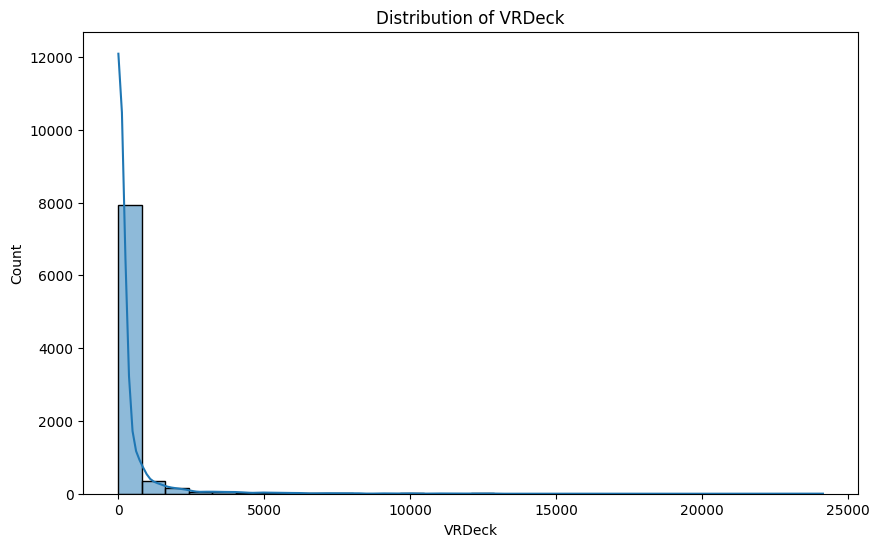

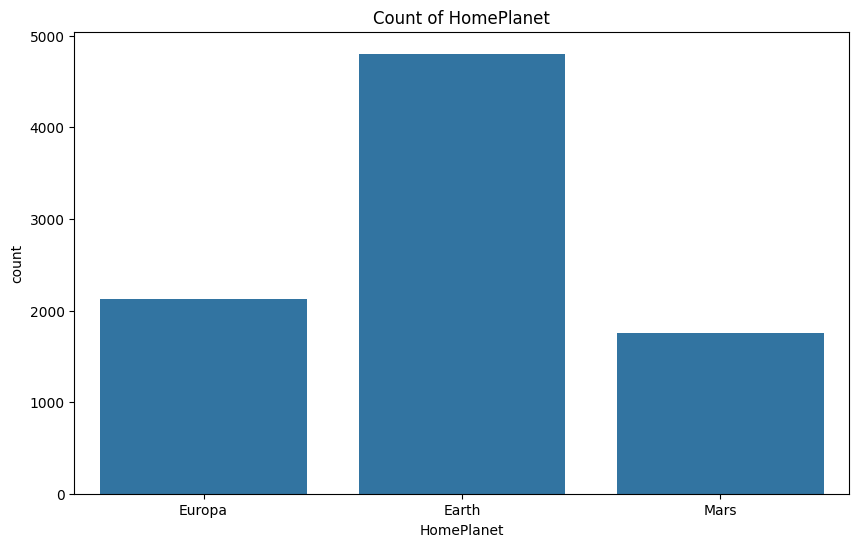

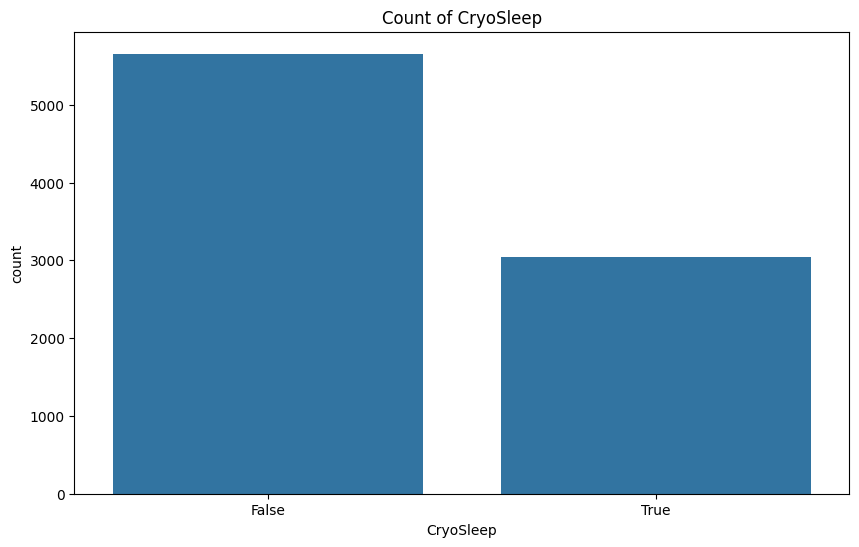

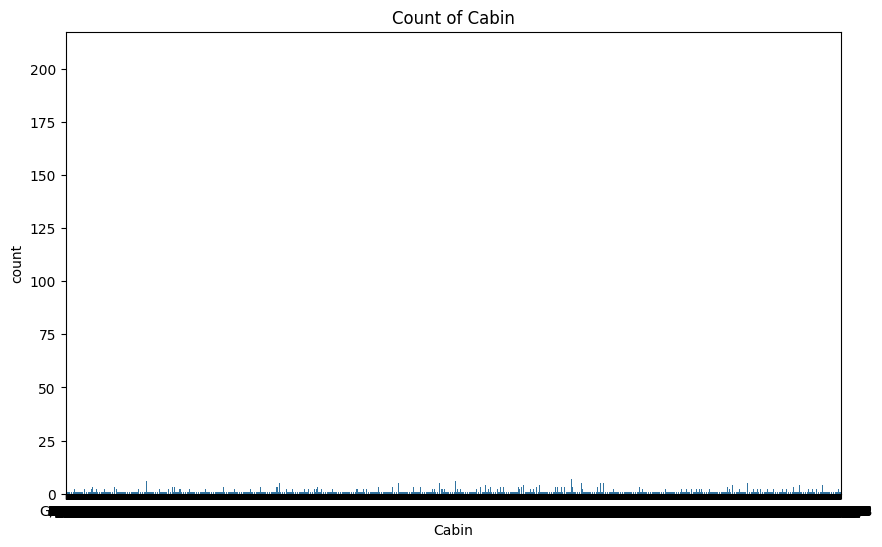

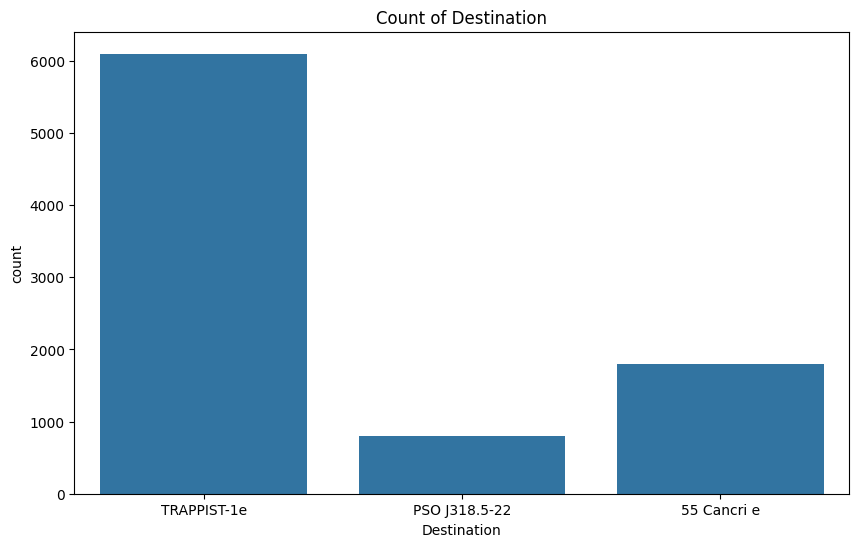

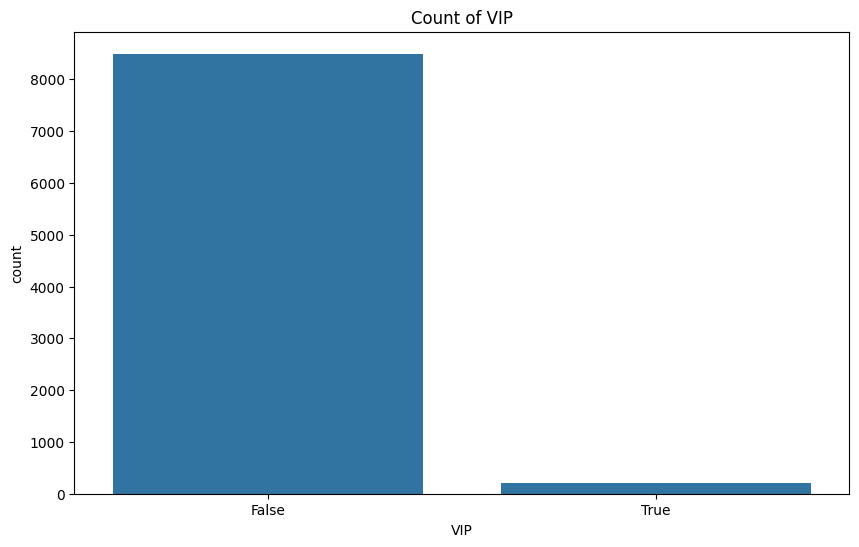

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical features
for feature in numeric_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot distribution of categorical features
for feature in categorical_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()


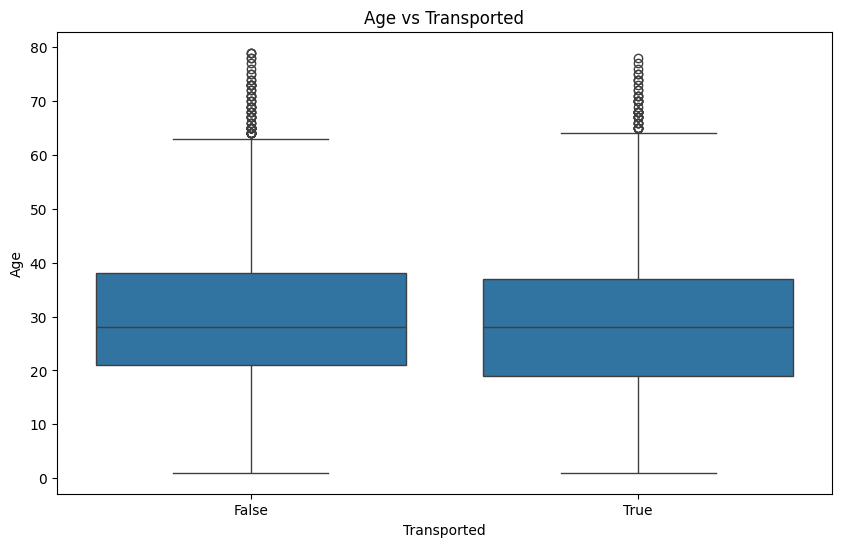

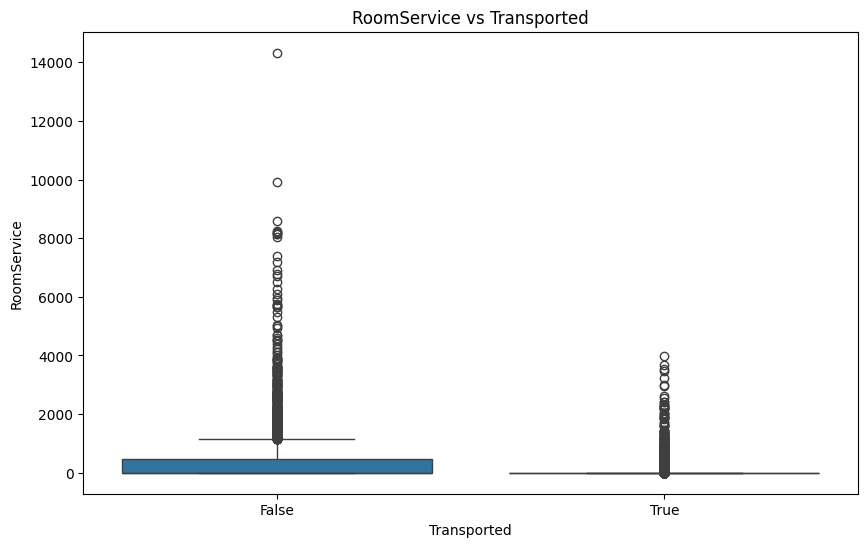

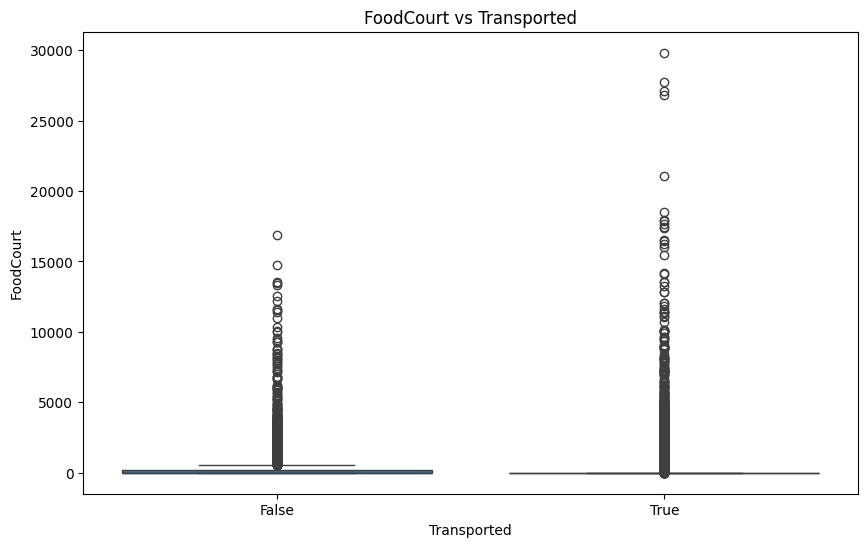

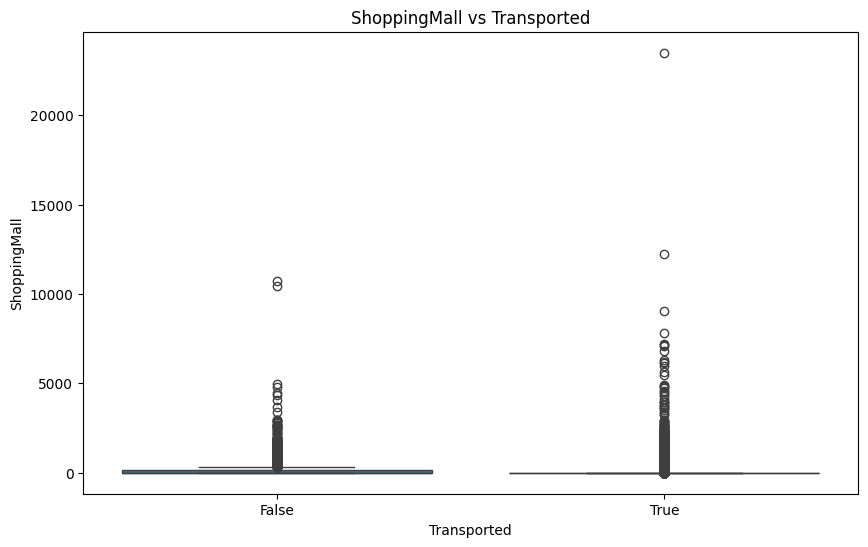

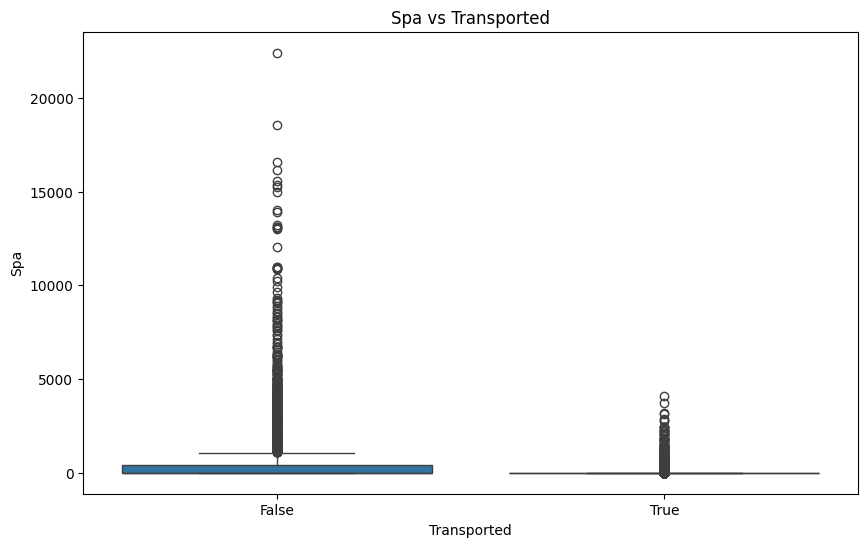

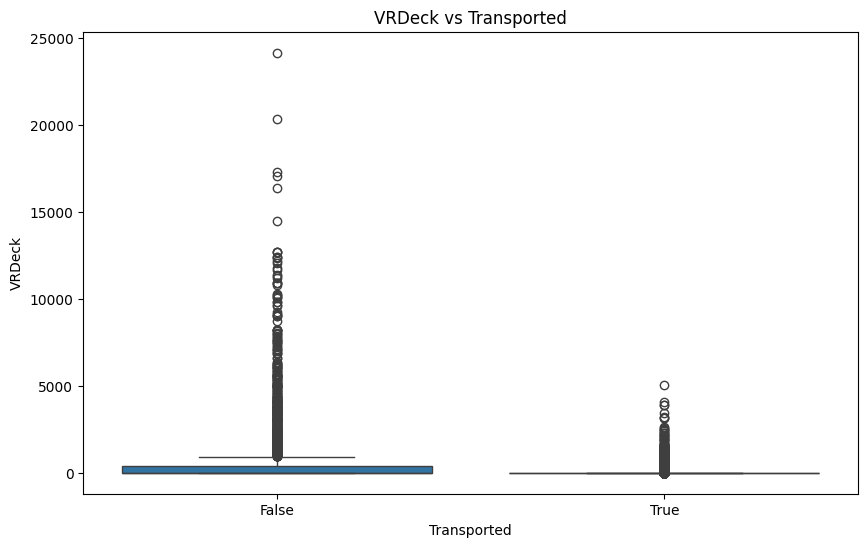

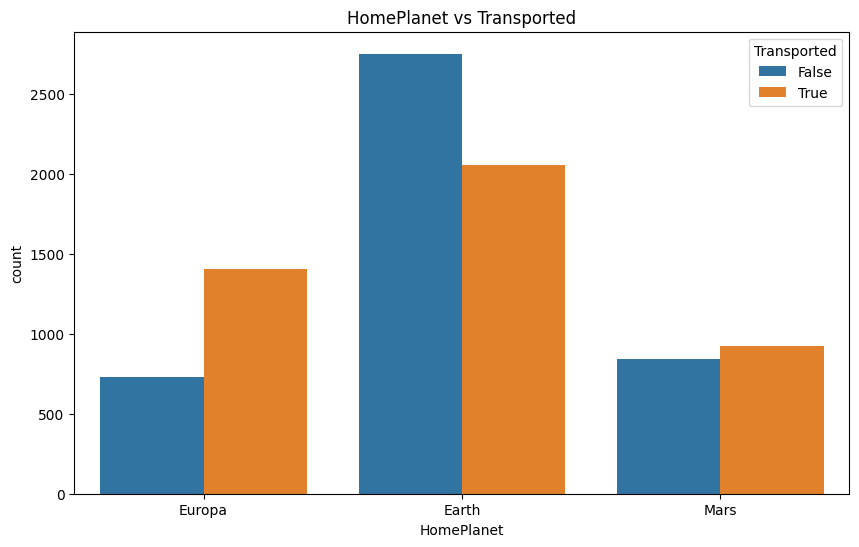

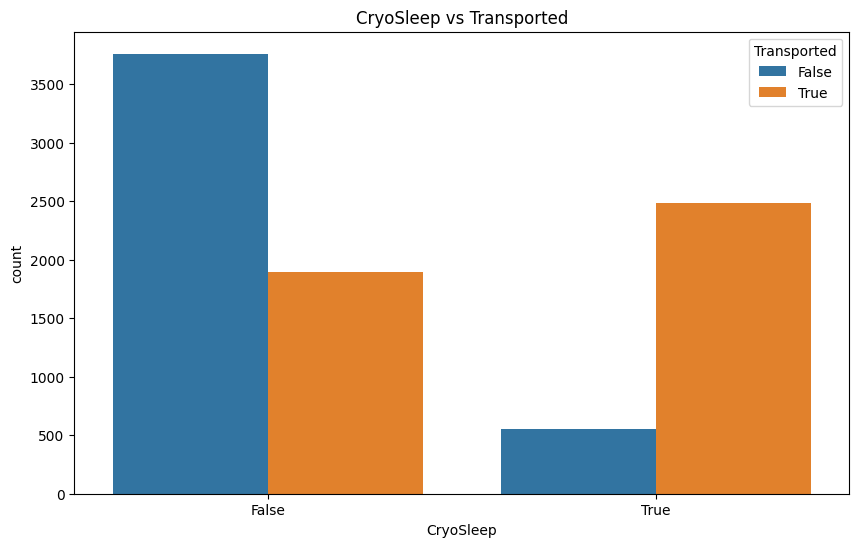

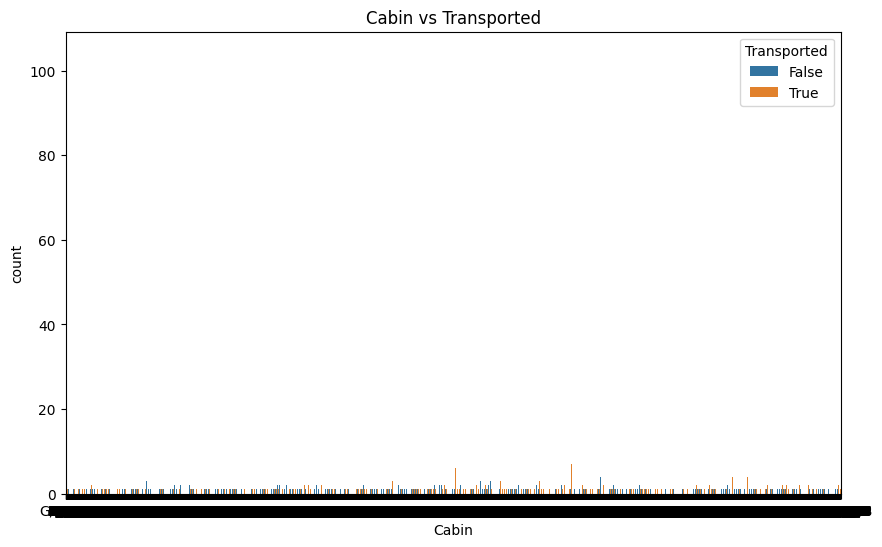

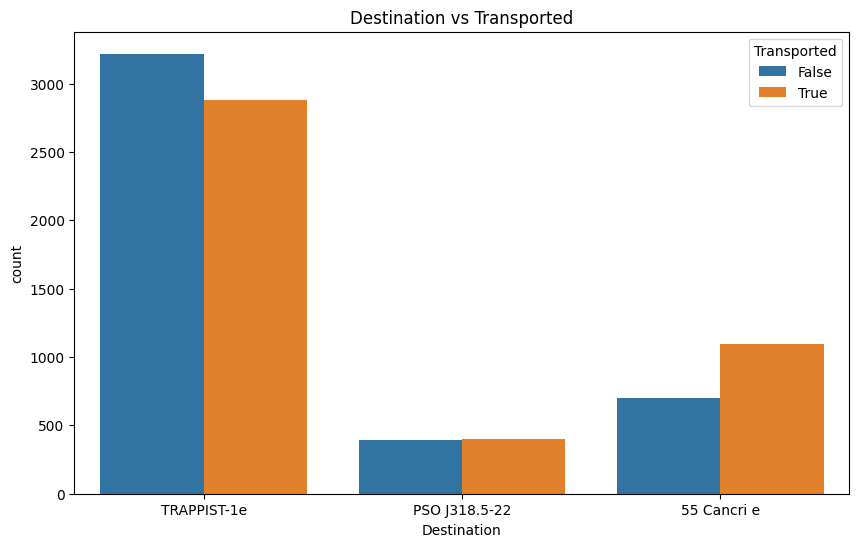

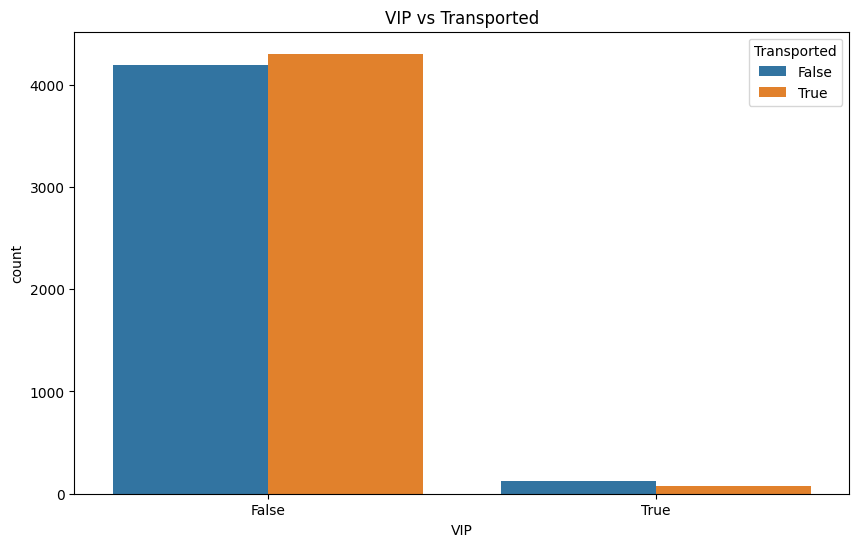

In [ ]:
# Plot relationship between numerical features and target variable 'Transported'
for feature in numeric_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Transported', y=feature)
    plt.title(f'{feature} vs Transported')
    plt.show()

# Plot relationship between categorical features and target variable 'Transported'
for feature in categorical_features_space_tit:
    if feature != 'Transported':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=train_df, x=feature, hue='Transported')
        plt.title(f'{feature} vs Transported')
        plt.show()


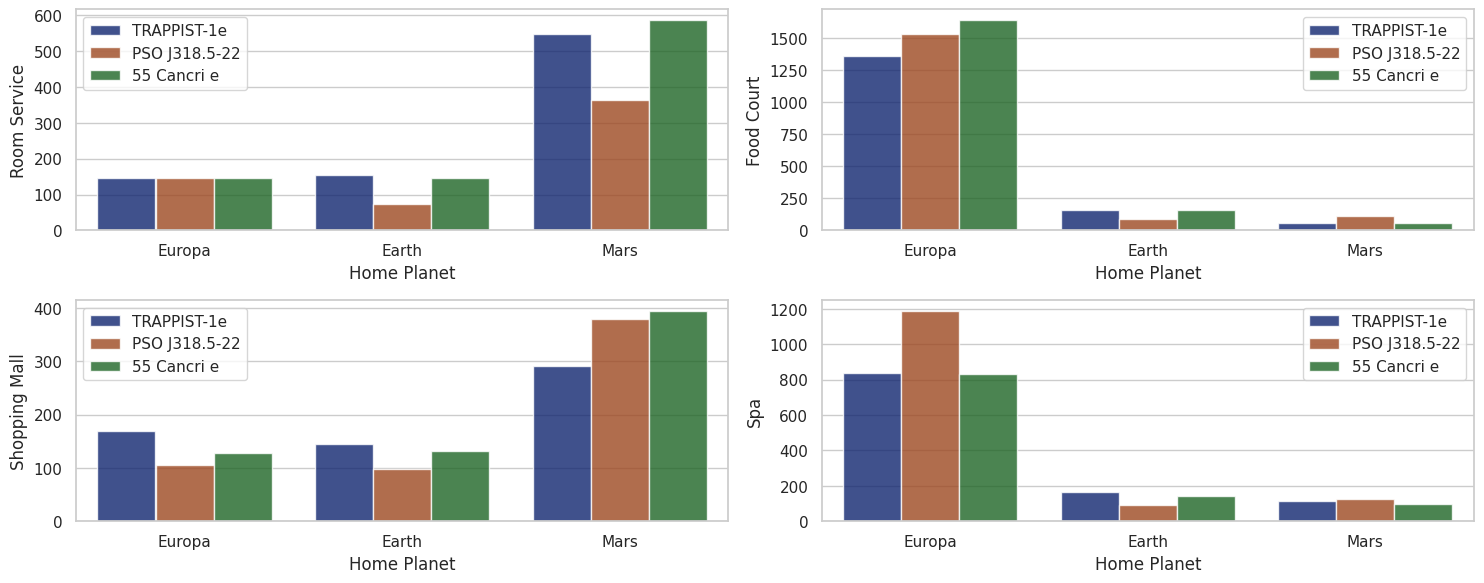

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.barplot(
    data=train_df, x="HomePlanet", y="FoodCourt", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[0,1],
    )
sns.barplot(
    data=train_df, x="HomePlanet", y="RoomService", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[0, 0]
    )
sns.barplot(
    data=train_df,x="HomePlanet", y="ShoppingMall", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[1, 0]
    )
sns.barplot(
    data=train_df, x="HomePlanet", y="Spa", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax = axes[1,1]
    )
axes[0,0].legend(title="")
axes[0,1].legend(title="")
axes[1,0].legend(title="")
axes[1,1].legend(title="")
axes[0,0].set_xlabel("Home Planet")
axes[0,0].set_ylabel("Room Service")
axes[0,1].set_xlabel("Home Planet")
axes[0,1].set_ylabel("Food Court")
axes[1,0].set_xlabel("Home Planet")
axes[1,0].set_ylabel("Shopping Mall")
axes[1,1].set_xlabel("Home Planet")
plt.tight_layout()
plt.show()

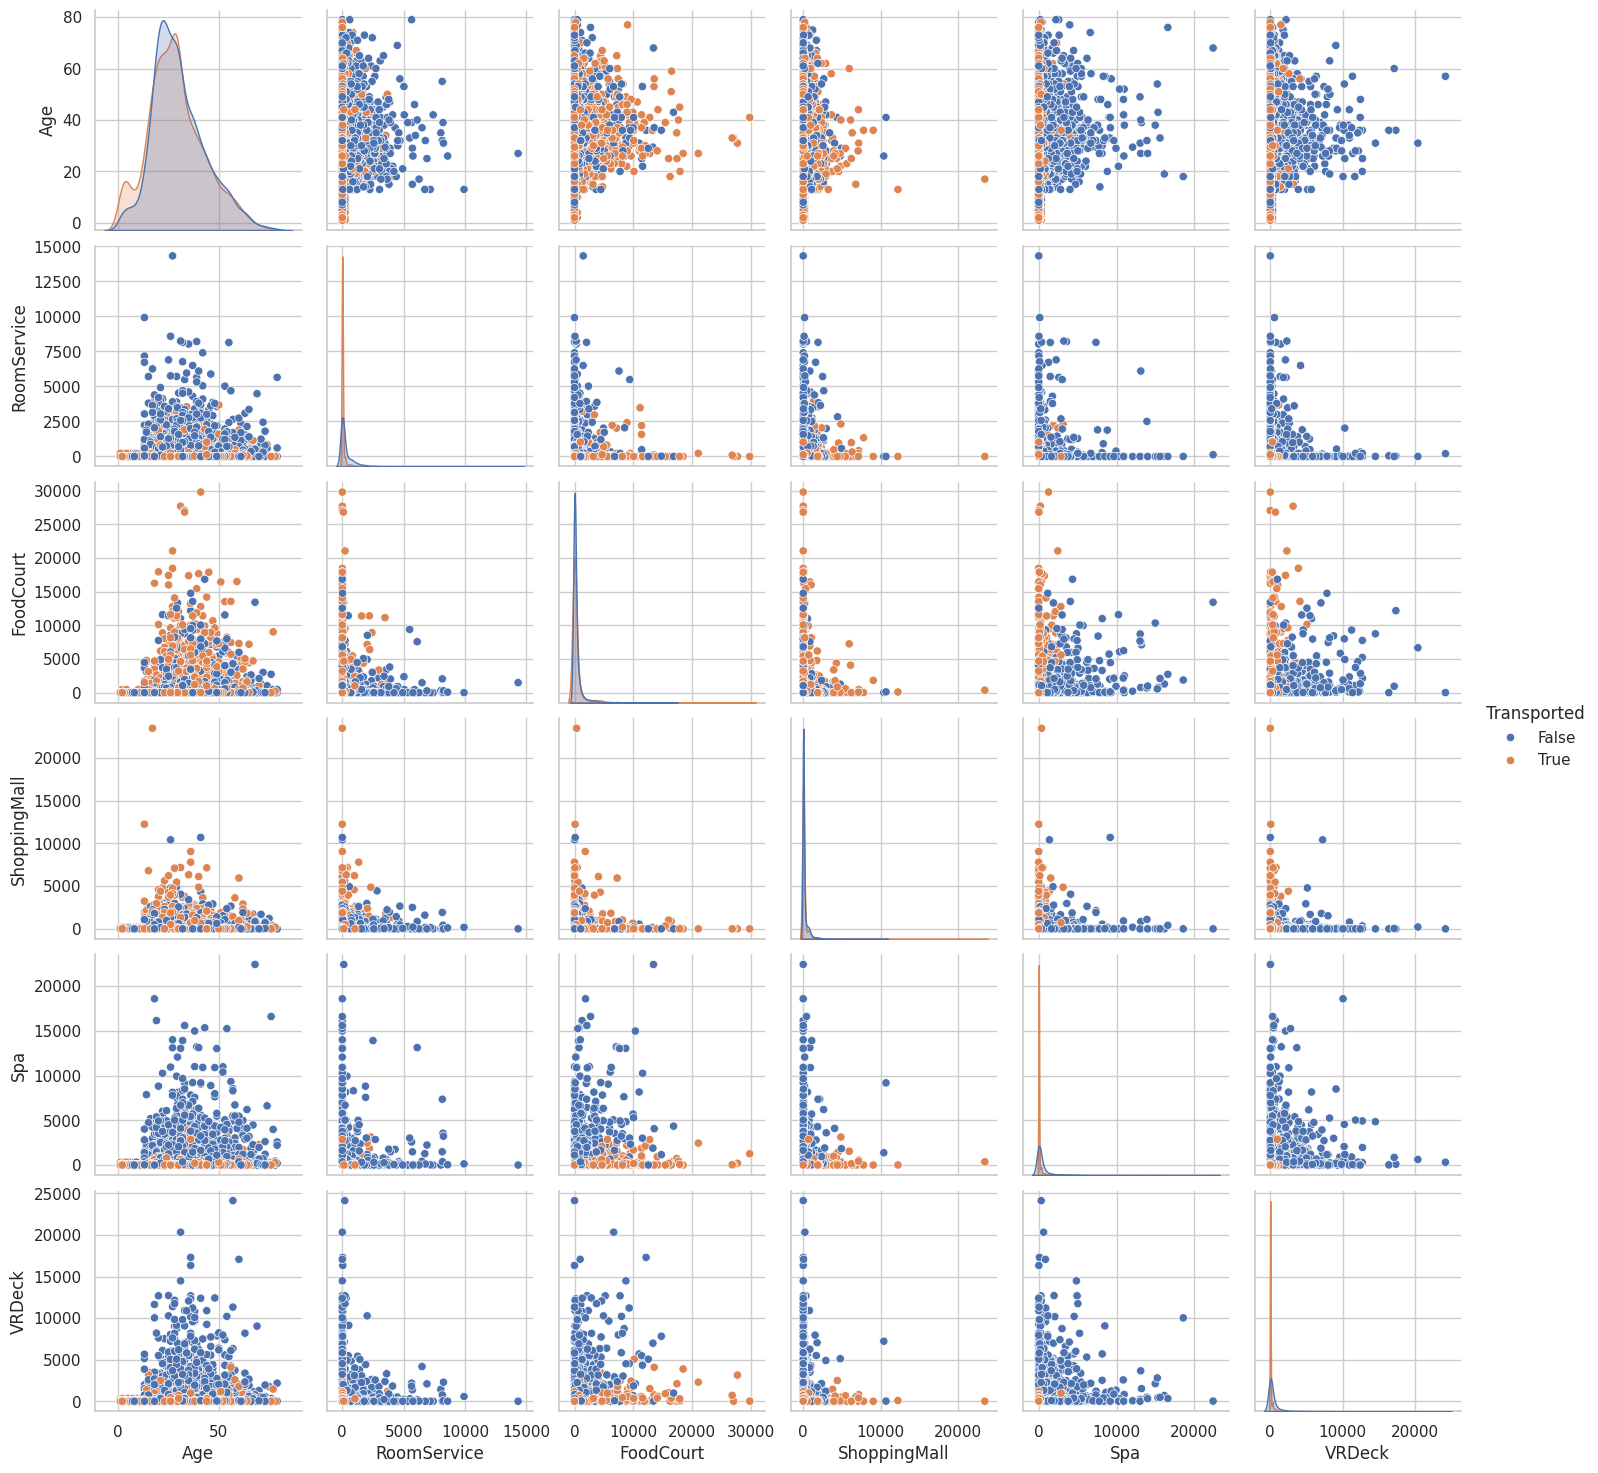

In [ ]:
# Pairplot of numerical features colored by 'Transported'
sns.pairplot(train_df, hue='Transported', vars=numeric_features_space_tit)
plt.show()


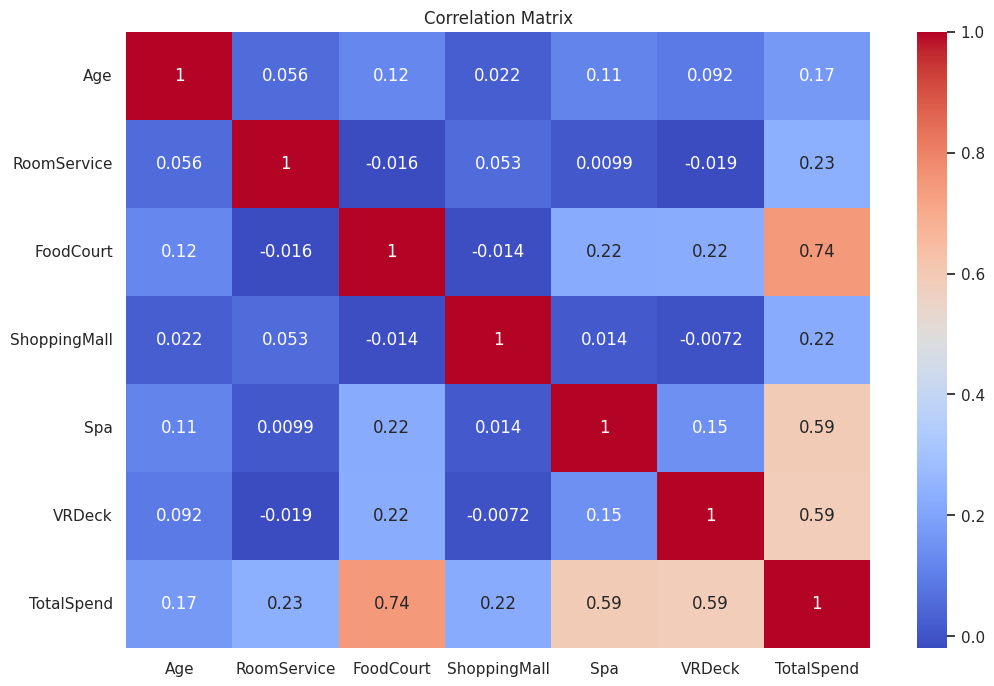

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the new feature 'TotalSpend'
train_df['TotalSpend'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalSpend'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']
# Select only numeric columns for correlation matrix
numeric_columns = train_df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with 0 (or another strategy you prefer)
train_df[numeric_columns] = train_df[numeric_columns].fillna(0)

# Calculate the correlation matrix
correlation_matrix = train_df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpend
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0
4273,9269_01,Earth,False,G/734/S,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.23075,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,29.23075,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0


In [ ]:
# Convert the imputed arrays back to DataFrames
train_df[categorical_features_space_tit] = pd.DataFrame(train_df[categorical_features_space_tit], columns=categorical_features_space_tit)
test_df[categorical_features_space_tit] = pd.DataFrame(test_df[categorical_features_space_tit], columns=categorical_features_space_tit)
categorical_features_new = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Check if 'Cabin' column is present in both datasets
train_has_cabin = 'Cabin' in train_df.columns
test_has_cabin = 'Cabin' in test_df.columns

if train_has_cabin and test_has_cabin:
    # Feature Engineering: Extract deck, num, and side from Cabin in both training and test sets
    train_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = train_df['Cabin'].str.split('/', expand=True)
    test_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = test_df['Cabin'].str.split('/', expand=True)

    # Drop the original Cabin column in both sets
    train_df = train_df.drop(columns=['Cabin'])
    test_df = test_df.drop(columns=['Cabin'])

    # Convert Cabin_num to numeric in both sets
    train_df['Cabin_num'] = pd.to_numeric(train_df['Cabin_num'], errors='coerce')
    test_df['Cabin_num'] = pd.to_numeric(test_df['Cabin_num'], errors='coerce')

    # Replace zero values in Cabin_num with NaN
    train_df['Cabin_num'] = train_df['Cabin_num'].replace(0, np.nan)
    test_df['Cabin_num'] = test_df['Cabin_num'].replace(0, np.nan)

    # Initialize the SimpleImputer for numeric features
    numeric_imputer = SimpleImputer(strategy='mean')

    # Impute missing values in Cabin_num for both sets
    train_df['Cabin_num'] = numeric_imputer.fit_transform(train_df[['Cabin_num']])
    test_df['Cabin_num'] = numeric_imputer.transform(test_df[['Cabin_num']])

    # One-Hot encode the new categorical features in both sets
    train_df = pd.get_dummies(train_df, columns=['Cabin_deck', 'Cabin_side'], drop_first=True)
    test_df = pd.get_dummies(test_df, columns=['Cabin_deck', 'Cabin_side'], drop_first=True)

# One-hot encode the categorical features
train_df = pd.get_dummies(train_df, columns=categorical_features_new, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features_new, drop_first=True)



In [ ]:
# Ensure both train and test sets have the same columns after one-hot encoding
missing_column = set(train_df.columns) - set(test_df.columns)
for col in missing_column:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Transported')]  # Drop 'Transported' since it's not in the test set

# Split the training data into features and target
X_train = train_df.drop(columns=['PassengerId', 'Transported', 'Name'])
y_train = train_df['Transported']

# Prepare the test set features
X_test = test_df.drop(columns=['PassengerId', 'Name'])

# Verify the feature columns match
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())


Columns in X_train: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Cabin_num', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True']
Columns in X_test: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Cabin_num', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True']


In [ ]:
train_df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,...,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,...,False,False,False,False,True,False,False,False,True,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,...,True,False,False,True,False,False,False,False,True,False
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,...,False,False,False,True,True,False,False,False,True,True
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,...,False,False,False,True,True,False,False,False,True,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,...,False,False,False,False,True,False,False,False,False,True
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,...,False,True,False,True,False,False,True,True,False,False
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,...,False,True,False,True,False,False,False,False,True,False
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
test_df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpend,Cabin_num,...,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0013_01,27.00000,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,3.000000,...,False,True,False,True,False,False,True,False,True,False
1,0018_01,19.00000,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,4.000000,...,True,False,False,True,False,False,False,False,True,False
2,0019_01,31.00000,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,604.678847,...,False,False,False,True,True,False,True,False,False,False
3,0021_01,38.00000,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,1.000000,...,False,False,False,True,True,False,False,False,True,False
4,0023_01,20.00000,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,5.000000,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.00000,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,1496.000000,...,False,True,False,True,False,False,True,False,True,False
4273,9269_01,42.00000,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0,734.000000,...,False,True,False,True,False,False,False,False,True,False
4274,9271_01,29.23075,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,296.000000,...,False,False,False,False,False,True,True,False,False,False
4275,9273_01,29.23075,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0,297.000000,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.metrics import accuracy_score
# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_RFC.fit(X_train_split, y_train_split)

# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(model_RFC, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")
# Measure the time taken to train the model
start_time = time.time()

# Train the model
model_RFC.fit(X_train_split, y_train_split)

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

# Evaluate on the validation set
val_score = model_RFC.score(X_val, y_val)
#print(f"Validation score: {val_score}")

val_predictions = model_RFC.predict(X_val)
val_score_acc = accuracy_score(y_val, val_predictions)
print(f"Validation accuracy: {val_score_acc}")

# Make predictions on the test set
test_predictions = model_RFC.predict(X_test)

# Load the original test dataset to get the PassengerId
original_test_df = test_df

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions
})

# Convert boolean to the required format (e.g., True/False to 1/0 or any other required format)
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Cross-validation scores: [0.76710753 0.76250719 0.79873491 0.81818182 0.78365938]
Mean cross-validation score: 0.7860381645999744
Training time: 0.804060697555542 seconds
Validation accuracy: 0.7901092581943646
Submission file created: submission.csv


In [ ]:
#compare 4 models

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define models and their parameters
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [-1, 10, 20]
    }
}

# Function to perform grid search and return the best model
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model.__class__.__name__}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Train and evaluate each model
best_models = {}
for model_name in models.keys():
    print(f"Training {model_name}...")
    best_model = perform_grid_search(models[model_name], param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model

# Evaluate on the validation set
for model_name, model in best_models.items():
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Validation accuracy for {model_name}: {val_accuracy}")

# Choose the best model and make predictions on the test set
best_model_name = max(best_models, key=lambda name: accuracy_score(y_val, best_models[name].predict(X_val)))
best_model = best_models[best_model_name]
print(f"Best model: {best_model_name}")

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions
})
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Training RandomForest...
Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForestClassifier: 0.7975422034673314
Training GradientBoosting...
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score for GradientBoostingClassifier: 0.7890305064019043
Training XGBoost...
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score for XGBClassifier: 0.7914456213675174
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

In [ ]:

# Split the training data into features and target
X_train = train_df.drop(columns=['PassengerId', 'Transported', 'Name'])
y_train = train_df['Transported']

# Prepare the test set features
X_test = test_df.drop(columns=['PassengerId', 'Name'])

# Ensure no NaNs
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define individual models
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=2, n_estimators=200)
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth=3, n_estimators=200)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', learning_rate=0.05, max_depth=3, n_estimators=300)
lgbm_model = LGBMClassifier(random_state=42, learning_rate=0.01, max_depth=-1, n_estimators=300)

# Train individual models
rf_model.fit(X_train_split, y_train_split)
gb_model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)
lgbm_model.fit(X_train_split, y_train_split)

# Define and train the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
], voting='soft')
voting_clf.fit(X_train_split, y_train_split)

# Evaluate the voting classifier on the validation set
val_score_voting = voting_clf.score(X_val, y_val)
print(f"Validation score for Voting Classifier: {val_score_voting}")






In [ ]:
# Hyperparameter tuning with Bayesian optimization for XGBoost
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    clf = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

space = {
    'max_depth': scope.int(hp.quniform('max_depth', 3, 10, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 50)),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print(f"Best parameters found: {best_params}")

# Convert float values to int for certain parameters
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Train the best XGBoost model
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Evaluate on the validation set
val_score_best_xgb = best_xgb_model.score(X_val, y_val)
print(f"Validation score for Best XGBoost: {val_score_best_xgb}")

100%|██████████| 50/50 [02:04<00:00,  2.48s/trial, best loss: -0.7929415937495659]
Best parameters found: {'gamma': 0.08732372773644233, 'learning_rate': 0.07525788344963576, 'max_depth': 4.0, 'n_estimators': 150.0, 'reg_alpha': 0.9040362397008661, 'reg_lambda': 0.8327053504834877}
Validation score for Best XGBoost: 0.8338125359401956
